In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\\Games\\Datasets\\Titanic\\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

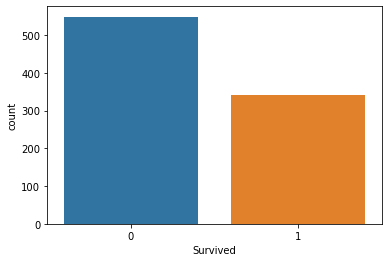

In [4]:
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

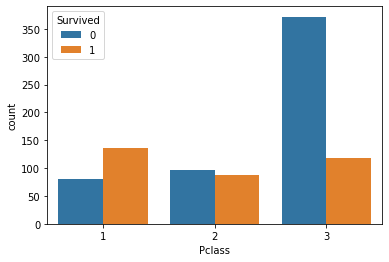

In [5]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

In [6]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [7]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Sir               1
Lady              1
Don               1
Capt              1
Mme               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [8]:
Other = ['Dr', 'Rev', 'Major', 'Mlle', 'Col', 'Jonkheer', 'the Countess', 'Don', 'Lady', 'Mme', 'Ms', 'Sir', 'Capt']

In [9]:
train['Title'].replace(Other, 'Other', inplace = True)

<AxesSubplot:xlabel='Title', ylabel='count'>

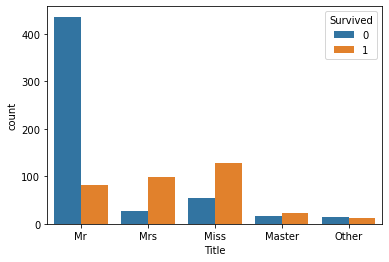

In [10]:
sns.countplot(x = 'Title', hue = 'Survived', data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

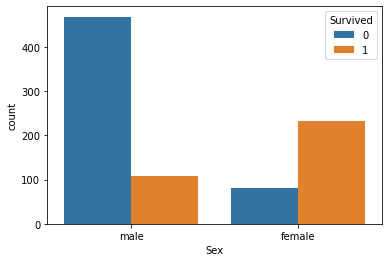

In [11]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

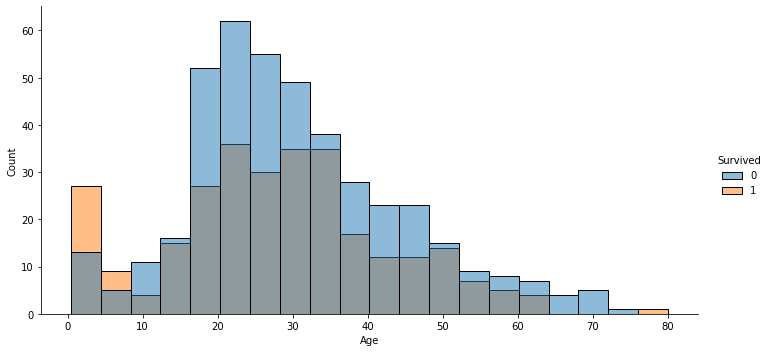

In [12]:
sns.displot(x = 'Age', hue = 'Survived', aspect = 2, data = train)

In [13]:
train.query("Age == 'nan'").groupby('Title').agg({'Title': 'count'})

,Title
Title,
Master,4
Miss,36
Mr,119
Mrs,17
Other,1


In [14]:
Master_mean = train.query("Title == 'Master'")['Age'].mean()
Miss_mean = train.query("Title == 'Miss'")['Age'].mean()
Mr_mean = train.query("Title == 'Mr'")['Age'].mean()
Mrs_mean = train.query("Title == 'Mrs'")['Age'].mean()
Other_mean = train.query("Title == 'Other'")['Age'].mean()

In [15]:
train.loc[train['Title'] == 'Master', 'Age'] = train.loc[train['Title'] == 'Master', 'Age'].fillna(Master_mean)
train.loc[train['Title'] == 'Miss', 'Age'] = train.loc[train['Title'] == 'Miss', 'Age'].fillna(Miss_mean)
train.loc[train['Title'] == 'Mr', 'Age'] = train.loc[train['Title'] == 'Mr', 'Age'].fillna(Mr_mean)
train.loc[train['Title'] == 'Mrs', 'Age'] = train.loc[train['Title'] == 'Mrs', 'Age'].fillna(Mrs_mean)
train.loc[train['Title'] == 'Other', 'Age'] = train.loc[train['Title'] == 'Other', 'Age'].fillna(Other_mean)

In [16]:
train['Age'].isna().sum()

0

In [17]:
train['Family'] = train['SibSp'] + train['Parch'] + 1

<AxesSubplot:xlabel='Family', ylabel='count'>

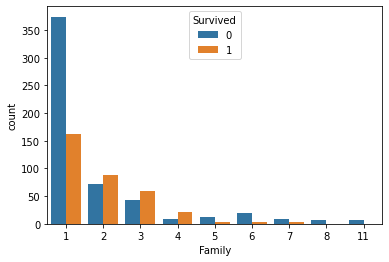

In [18]:
sns.countplot(x = 'Family', hue = 'Survived', data = train)

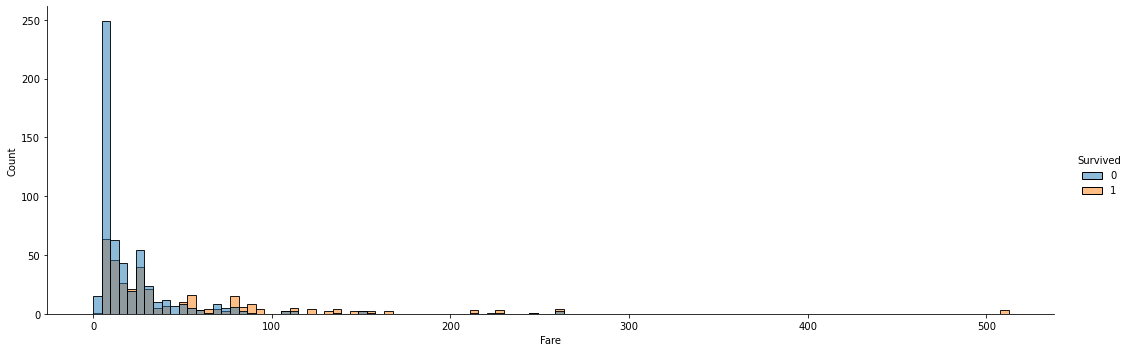

In [19]:
sns.displot(x = 'Fare', hue = 'Survived', aspect = 3, data = train)

In [20]:
train['FareCat'] = train['Fare']

In [21]:
train.loc[train['FareCat'] <= 50, 'FareCat'] = 0

In [22]:
train.loc[(train['FareCat'] > 50) & (train['FareCat'] < 100), 'FareCat'] = 1

In [23]:
train.loc[(train['FareCat'] > 100) & (train['FareCat'] < 200), 'FareCat'] = 2

In [24]:
train.loc[(train['FareCat'] > 200) & (train['FareCat'] < 300), 'FareCat'] = 3

In [25]:
train.loc[train['FareCat'] > 300, 'FareCat'] = 4

In [26]:
train['FareCat'].value_counts()

0.0    731
1.0    107
2.0     33
3.0     17
4.0      3
Name: FareCat, dtype: int64

<AxesSubplot:xlabel='FareCat', ylabel='count'>

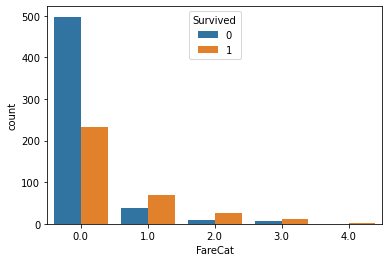

In [27]:
sns.countplot(x = 'FareCat', hue = 'Survived', data = train)

In [28]:
train['Cabin'].fillna(0, inplace = True)

In [29]:
train.loc[train['Cabin'] != 0, 'Cabin'] = 1

<AxesSubplot:xlabel='Cabin', ylabel='count'>

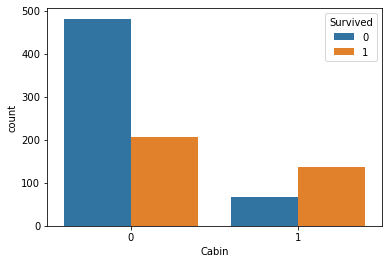

In [30]:
sns.countplot(x = 'Cabin', hue = 'Survived', data = train)

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
train['Embarked'].fillna('S', inplace = True)

In [33]:
train_preprocess = train[['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Embarked', 'Title', 'Family', 'FareCat']]

In [34]:
train_preprocess.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Title,Family,FareCat
0,0,3,male,22.0,0,S,Mr,2,0.0
1,1,1,female,38.0,1,C,Mrs,2,1.0
2,1,3,female,26.0,0,S,Miss,1,0.0
3,1,1,female,35.0,1,S,Mrs,2,1.0
4,0,3,male,35.0,0,S,Mr,1,0.0


In [35]:
train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Cabin     891 non-null    object 
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    object 
 7   Family    891 non-null    int64  
 8   FareCat   891 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train_preprocess.drop('Survived', axis = 1), 
                                                    train_preprocess['Survived'], 
                                                    random_state = 42)

In [38]:
cat_columns = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title', 'Family', 'FareCat']
num_columns_for_bin = ['Age']

In [39]:
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])
num_bin_pipe = Pipeline([('bin', KBinsDiscretizer())])

In [40]:
transformers = [('num_bin', num_bin_pipe, num_columns_for_bin), ('cat', cat_pipe, cat_columns)]

In [41]:
ct = ColumnTransformer(transformers = transformers)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
ml_pipe = Pipeline([('transform', ct), ('logreg', LogisticRegression(solver = 'liblinear'))])

In [44]:
param_grid = {'transform__num_bin__bin__n_bins': [3, 4, 5], 
              'transform__num_bin__bin__strategy': ['uniform', 'quantile', 'kmeans'], 
              'logreg__C': [.01, .1, .5, 1, 5, 10]}

In [45]:
gs = GridSearchCV(ml_pipe, param_grid, cv = 5, return_train_score = False)

In [46]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num_bin',
                                                                         Pipeline(steps=[('bin',
                                                                                          KBinsDiscretizer())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Pclass',
                                       

In [47]:
gs.best_params_

{'logreg__C': 1,
 'transform__num_bin__bin__n_bins': 4,
 'transform__num_bin__bin__strategy': 'kmeans'}

In [48]:
gs.best_score_

0.8323420491527326

In [49]:
ml_pipe_2 = Pipeline([('transform', ct), ('tree', DecisionTreeClassifier())])
ml_pipe_3 = Pipeline([('transform', ct), ('xgb', XGBClassifier())])
ml_pipe_4 = Pipeline([('transform', ct), ('forest', RandomForestClassifier())])

In [50]:
param_grid_2 = {'transform__num_bin__bin__n_bins': [3, 4, 5], 
              'transform__num_bin__bin__strategy': ['uniform', 'quantile', 'kmeans'], 
              'tree__max_depth': range(5, 15)}
param_grid_3 = {'transform__num_bin__bin__n_bins': [3, 4, 5], 
              'transform__num_bin__bin__strategy': ['uniform', 'quantile', 'kmeans'], 
              'xgb__max_depth': range(3, 7), 'xgb__gamma': range(3, 7)}
param_grid_4 = {'transform__num_bin__bin__n_bins': [3, 4, 5], 
              'transform__num_bin__bin__strategy': ['uniform', 'quantile', 'kmeans'], 
              'forest__max_depth': range(5, 15)}

In [51]:
gs_2 = GridSearchCV(ml_pipe_2, param_grid_2, cv = 5, return_train_score = False)
gs_3 = GridSearchCV(ml_pipe_3, param_grid_3, cv = 5, return_train_score = False)
gs_4 = GridSearchCV(ml_pipe_4, param_grid_4, cv = 5, return_train_score = False)

In [52]:
gs_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num_bin',
                                                                         Pipeline(steps=[('bin',
                                                                                          KBinsDiscretizer())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Pclass',
                                       

In [53]:
gs_2.best_params_

{'transform__num_bin__bin__n_bins': 4,
 'transform__num_bin__bin__strategy': 'kmeans',
 'tree__max_depth': 9}

In [54]:
gs_3.fit(X_train, y_train)

[19:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num_bin',
                                                                         Pipeline(steps=[('bin',
                                                                                          KBinsDiscretizer())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Pclass',
                                       

In [55]:
gs_3.best_params_

{'transform__num_bin__bin__n_bins': 4,
 'transform__num_bin__bin__strategy': 'kmeans',
 'xgb__gamma': 3,
 'xgb__max_depth': 5}

In [56]:
gs_4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num_bin',
                                                                         Pipeline(steps=[('bin',
                                                                                          KBinsDiscretizer())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Pclass',
                                       

In [57]:
gs_4.best_params_

{'forest__max_depth': 9,
 'transform__num_bin__bin__n_bins': 4,
 'transform__num_bin__bin__strategy': 'kmeans'}

In [59]:
gs.best_score_

0.8323420491527326

In [60]:
gs_2.best_score_

0.8234541577825161

In [61]:
gs_3.best_score_

0.8323644933228593

In [62]:
gs_4.best_score_

0.8353832342049152

In [63]:
gs_4.score(X_test, y_test)

0.8071748878923767

In [64]:
gs.score(X_test, y_test)

0.820627802690583

In [65]:
gs_3.score(X_test, y_test)

0.8430493273542601

In [66]:
gs_2.score(X_test, y_test)

0.7982062780269058